# Anime Ratings Analysis

**Importing the necessary libraries datasets**

In [402]:
# importing all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

In [403]:
#loading the datasets
anime_details = pd.read_csv('Data/anime.csv')
anime_ratings = pd.read_csv('Data/rating.csv')

**Creating dictionaries to be used for styling the index, data and the caption**

In [404]:
# Creating dictionaries for different aspects to be used for styling in the whole project.
headers = { #header styling
    'selector': 'th:not(.index_name)',
    'props': [('background-color', '#474440'), ('color', 'white'),('text-align', 'left')]
}

caption = { #caption styling
    'selector': 'caption',
    'props': [('font-weight', 'bold'), ('color', '#363445'),('text-align', 'left')]
}

cells = {  # row styling
    'selector': 'tr',
    'props': [('background-color', '#d7e1ee'), ('color', 'black'),('text-align', 'left')]
}

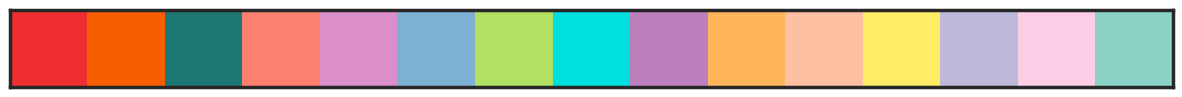

In [405]:
#creating a list of colors for Seaborn color palet
sns.set_style("white")
sns.set_context("poster",font_scale = .7)

colors = ["#ee2e31", "#f85e00" ,"#1d7874", "#fd7f6f", "#db8eca", "#7eb0d5", "#b2e061", "#00dfdf", "#bd7ebe", "#ffb55a", "#ffbfa3", "#ffee65", "#beb9db", "#fdcce5", "#8bd3c7"]
sns.palplot(sns.color_palette(colors))

### Descriptive Analysis

**Summarizing and cleaning anime_data**

In [406]:
# taking a look at the dataset by sorting the data frame on anime_id
anime_details.sort_values(by='anime_id').head().style.set_table_styles([headers,cells,caption]).hide(axis="index")\
    .format(precision=2).set_caption("Let's take a look at the anime dataset")

anime_id,name,genre,type,episodes,rating,total_members
1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,8.82,486824
5,Cowboy Bebop: Tengoku no Tobira,"Action, Drama, Mystery, Sci-Fi, Space",Movie,1,8.40,137636
6,Trigun,"Action, Comedy, Sci-Fi",TV,26,8.32,283069
7,Witch Hunter Robin,"Action, Drama, Magic, Mystery, Police, Supernatural",TV,26,7.36,64905
8,Beet the Vandel Buster,"Adventure, Fantasy, Shounen, Supernatural",TV,52,7.06,9848


In [407]:
# get a shape of the data frame
anime_details.shape

(12294, 7)

In [408]:
#information regarding the columns in the data frame
anime_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   anime_id       12294 non-null  int64  
 1   name           12294 non-null  object 
 2   genre          12232 non-null  object 
 3   type           12269 non-null  object 
 4   episodes       12294 non-null  object 
 5   rating         12064 non-null  float64
 6   total_members  12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [409]:
# looking at the episodes column to determine why it's type is object instead of int64
anime_details['episodes'].value_counts().sort_index(ascending=False).head(10).to_frame().T\
    .style.set_table_styles([headers,cells,caption]) #checking the data in episodes column

,Unknown,99,98,97,96,95,94,93,92,91
episodes,106,2,1,3,4,2,3,1,2,2


In [410]:
anime_details['episodes']= anime_details['episodes'].replace('Unknown',np.nan) #Converting unknown to NaN values, as the value won't be useful for our analysis
anime_details['episodes']= anime_details['episodes'].astype(float) #Converting episodes column to float

In [411]:
#Checking the number of duplicate values
print(f"No.of duplicate values in anime_data: {anime_details[anime_details.duplicated()].shape[0]}")

No.of duplicate values in anime_data: 0


In [412]:
#Checking for null values and eliminating them
display(anime_details.isna().sum().to_frame('count').sort_values(by='count',ascending=False).T\
    .style.set_table_styles([headers,cells,caption]).set_caption("No. of null values"))

anime_details.dropna(inplace = True)

display(anime_details.isna().sum().to_frame('count').sort_values(by='count',ascending=False).T\
    .style.set_table_styles([headers,cells,caption]).set_caption("No. of null values after dropping them"))

,rating,episodes,genre,type,anime_id,name,total_members
count,230,106,62,25,0,0,0


,anime_id,name,genre,type,episodes,rating,total_members
count,0,0,0,0,0,0,0


In [413]:
#Statistical glimpse of anime_details data
anime_details.describe(include='all').style.set_table_styles([headers,cells,caption]).set_caption("Summary of anime data").format(precision=2)

,anime_id,name,genre,type,episodes,rating,total_members
count,11942.00,11942,11942,11942,11942.00,11942.00,11942.00
unique,nan,11940,3224,6,nan,nan,nan
top,nan,Shi Wan Ge Leng Xiaohua,Hentai,TV,nan,nan,nan
freq,nan,2,810,3618,nan,nan,nan
mean,13566.41,nan,nan,nan,12.70,6.48,18406.31
std,11198.00,nan,nan,nan,47.43,1.02,55343.06
min,1.00,nan,nan,nan,1.00,1.67,12.00
25%,3375.50,nan,nan,nan,1.00,5.89,230.00
50%,9920.50,nan,nan,nan,2.00,6.57,1573.50
75%,23614.50,nan,nan,nan,12.00,7.18,9649.75


**Summarizing and cleaning anime_ratings**

In [414]:
# taking a look at the dataset by sorting the data frame on anime_id

anime_ratings.sort_values(by='anime_id').head(10).style.set_table_styles([headers,cells,caption]).hide(axis="index")\
    .format(precision=2).set_caption("Let's take a look at the ratings dataset")

user_id,anime_id,rating
47485,1,8
10115,1,9
31698,1,10
52930,1,7
5315,1,7
41370,1,-1
68570,1,10
58344,1,10
36606,1,7
65723,1,7


In [415]:
#information regarding the columns in the data frame 

anime_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB


In [416]:
#Checking for duplicate values and eliminating them

print(f"No.of duplicate values in anime_ratings: {anime_ratings[anime_ratings.duplicated()].shape[0]}")
anime_ratings.drop_duplicates(keep='first',inplace=True)
print(f"After removing duplicate values there are {anime_ratings.shape[0]} rows")

No.of duplicate values in anime_ratings: 1
After removing duplicate values there are 7813736 rows


In [417]:
#Checking the range of ratings
anime_ratings['rating'].value_counts().to_frame('count').sort_index().T\
    .style.set_table_styles([headers,cells,caption])

,-1,1,2,3,4,5,6,7,8,9,10
count,1476496,16649,23150,41453,104291,282806,637775,1375287,1646018,1254096,955715


In [418]:
#Converting -1 to NaN. -1 is assigned to those anime which users have watched but haven't provided any rating
anime_ratings['rating'].replace(to_replace = -1 , value = np.nan ,inplace=True)

#Checking for null values and eliminating them
display(anime_ratings.isna().sum().to_frame('count').sort_values(by='count',ascending=False).T\
    .style.set_table_styles([headers,cells,caption]).set_caption("No. of null values"))

anime_ratings.dropna(inplace = True)
display(anime_ratings.isna().sum().to_frame('count').sort_values(by='count',ascending=False).T\
    .style.set_table_styles([headers,cells,caption]).set_caption("No. of null values after dropping them"))

,rating,user_id,anime_id
count,1476496,0,0


,user_id,anime_id,rating
count,0,0,0


In [419]:
#Statistical glimpse of anime_ratings data
anime_ratings.describe(include='all').style.set_table_styles([headers,cells,caption]).set_caption("Summary of anime data").format(precision=2)

,user_id,anime_id,rating
count,6337240.00,6337240.00,6337240.00
mean,36747.91,8902.87,7.81
std,21013.40,8882.00,1.57
min,1.00,1.00,1.00
25%,18984.00,1239.00,7.00
50%,36815.00,6213.00,8.00
75%,54873.00,14075.00,9.00
max,73516.00,34475.00,10.00


<AxesSubplot:xlabel='type', ylabel='rating'>

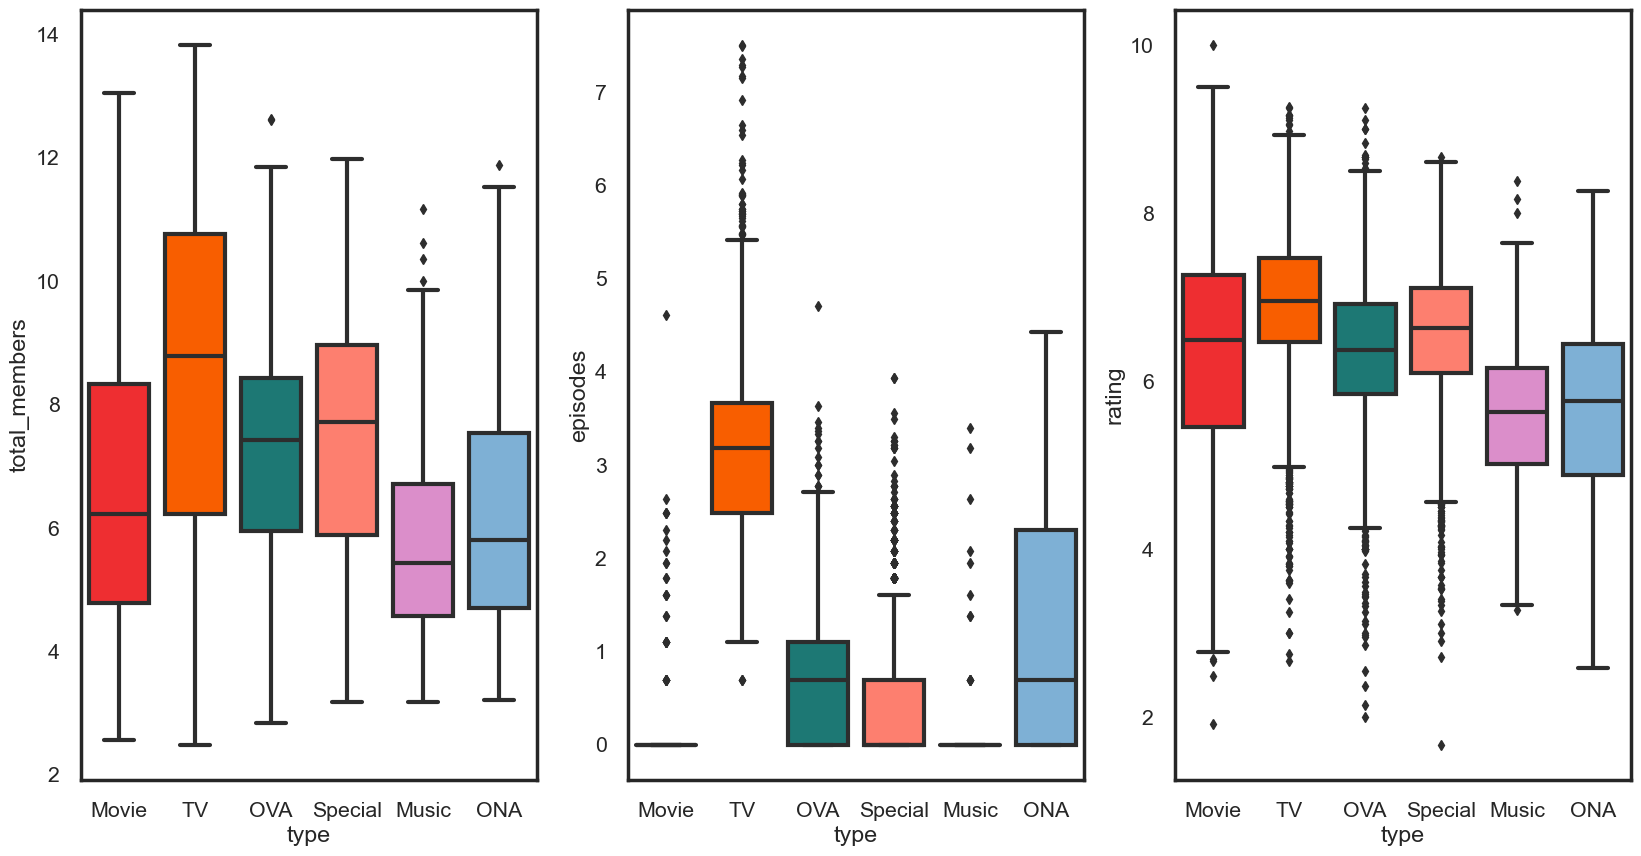

In [420]:
#Checking for outliers
fig, axes = plt.subplots(1, 3, figsize = (20, 10))
sns.boxplot(x=anime_details['type'],y=np.log(anime_details['total_members']),ax=axes[0],palette=colors, saturation=4)
sns.boxplot(x=anime_details['type'],y=np.log(anime_details['episodes']),ax=axes[1],palette=colors, saturation=4)
sns.boxplot(x=anime_details['type'],y=anime_details['rating'],ax=axes[2],palette=colors, saturation=4)

In [421]:
#Verifying if the outliers are actually that or if we can use the data without excluding them 
anime_details.query("(type == 'Movie' or type == 'Music') & episodes>1").sort_values(by=['type','episodes'],ascending=False)\
    .style.set_table_styles([headers,cells,caption]).set_caption("Checking the possible outliers").hide(axis=0)

anime_id,name,genre,type,episodes,rating,total_members
33108,Anime Douyou,"Kids, Music",Music,30.000000,5.750000,38
32633,Nowisee,Music,Music,24.000000,7.640000,560
5016,Fluximation,Music,Music,14.000000,6.740000,2240
4705,Tengen Toppa Gurren Lagann: Parallel Works,Music,Music,8.000000,7.270000,22213
8348,Tengen Toppa Gurren Lagann: Parallel Works 2,"Mecha, Music",Music,7.000000,7.090000,13361
14359,Vocaloid China Project Senden Animation,"Fantasy, Music",Music,5.000000,6.190000,1582
1998,Amazing Nuts!,"Adventure, Music, Police, Romance, Sci-Fi",Music,4.000000,6.740000,6650
3642,Shina Dark: Kuroki Tsuki no Ou to Souheki no Tsuki no Himegimi,"Ecchi, Fantasy, Harem, Music",Music,4.000000,6.230000,3730
30903,Children Record,Music,Music,2.000000,7.060000,745
33911,Gakuen Handsome: Legend of Sexy,"Comedy, Music",Music,2.000000,6.000000,363


**Merging the datasets**

In [422]:
# merging anime and ratings data frame on 'anime_id' and giving a suffix to columns from ratings data frame
anime_merged = pd.merge(anime_details,anime_ratings,on="anime_id",suffixes= [None, "_user"])
anime_merged = anime_merged.rename(columns={"rating_user": "user_rating"}) #renaming the columns

anime_merged.head().style.set_table_styles([headers,cells,caption]).set_caption("Let's take a look at the merged Dataset")

,anime_id,name,genre,type,episodes,rating,total_members,user_id,user_rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1.000000,9.370000,200630,99,5.000000
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1.000000,9.370000,200630,152,10.000000
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1.000000,9.370000,200630,244,10.000000
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1.000000,9.370000,200630,271,10.000000
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1.000000,9.370000,200630,322,10.000000


In [423]:
#getting the shape of the new data frame and creating a copy of it
print(anime_merged.shape)
anime_merged_temp = anime_merged.copy()

(6337144, 9)


In [424]:
#grouping the dataset by taking mean of the user_ratings and sum of the number of users who rated
anime_merged_temp = anime_merged_temp.groupby(by= ['anime_id','name','genre','type','episodes','rating','total_members']).agg({'user_id':'size', 'user_rating':'mean'}) \
.rename(columns={'user_id':'users_count','user_rating':'average_rating'})\
.reset_index()

**Data Visualization**

In [425]:
# creating a new data frame by sorting the values on 'total_members'
set1 = anime_merged_temp.sort_values(["total_members"],ascending=False)
set1.head().head().style.set_table_styles([headers,cells,caption])

,anime_id,name,genre,type,episodes,rating,total_members,users_count,average_rating
1388,1535,Death Note,"Mystery, Police, Psychological, Supernatural, Thriller",TV,37.000000,8.710000,1013917,34226,8.834629
7058,16498,Shingeki no Kyojin,"Action, Drama, Fantasy, Shounen, Super Power",TV,25.000000,8.540000,896229,25289,8.725770
6322,11757,Sword Art Online,"Action, Adventure, Fantasy, Game, Romance",TV,25.000000,7.830000,893100,26310,8.140213
3936,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Military, Shounen",TV,64.000000,9.260000,793665,21494,9.322741
4567,6547,Angel Beats!,"Action, Comedy, Drama, School, Supernatural",TV,13.000000,8.390000,717796,23565,8.549714


In [426]:
# creating a new data frame by sorting the values on 'users_count' and 'average rating'
set2 = anime_merged_temp.sort_values(["users_count", "average_rating"],ascending=False)
set2.head().head().style.set_table_styles([headers,cells,caption])

,anime_id,name,genre,type,episodes,rating,total_members,users_count,average_rating
1388,1535,Death Note,"Mystery, Police, Psychological, Supernatural, Thriller",TV,37.000000,8.710000,1013917,34226,8.834629
6322,11757,Sword Art Online,"Action, Adventure, Fantasy, Game, Romance",TV,25.000000,7.830000,893100,26310,8.140213
7058,16498,Shingeki no Kyojin,"Action, Drama, Fantasy, Shounen, Super Power",TV,25.000000,8.540000,896229,25289,8.725770
1426,1575,Code Geass: Hangyaku no Lelouch,"Action, Mecha, Military, School, Sci-Fi, Super Power",TV,25.000000,8.830000,715151,24126,8.927796
4567,6547,Angel Beats!,"Action, Comedy, Drama, School, Supernatural",TV,13.000000,8.390000,717796,23565,8.549714


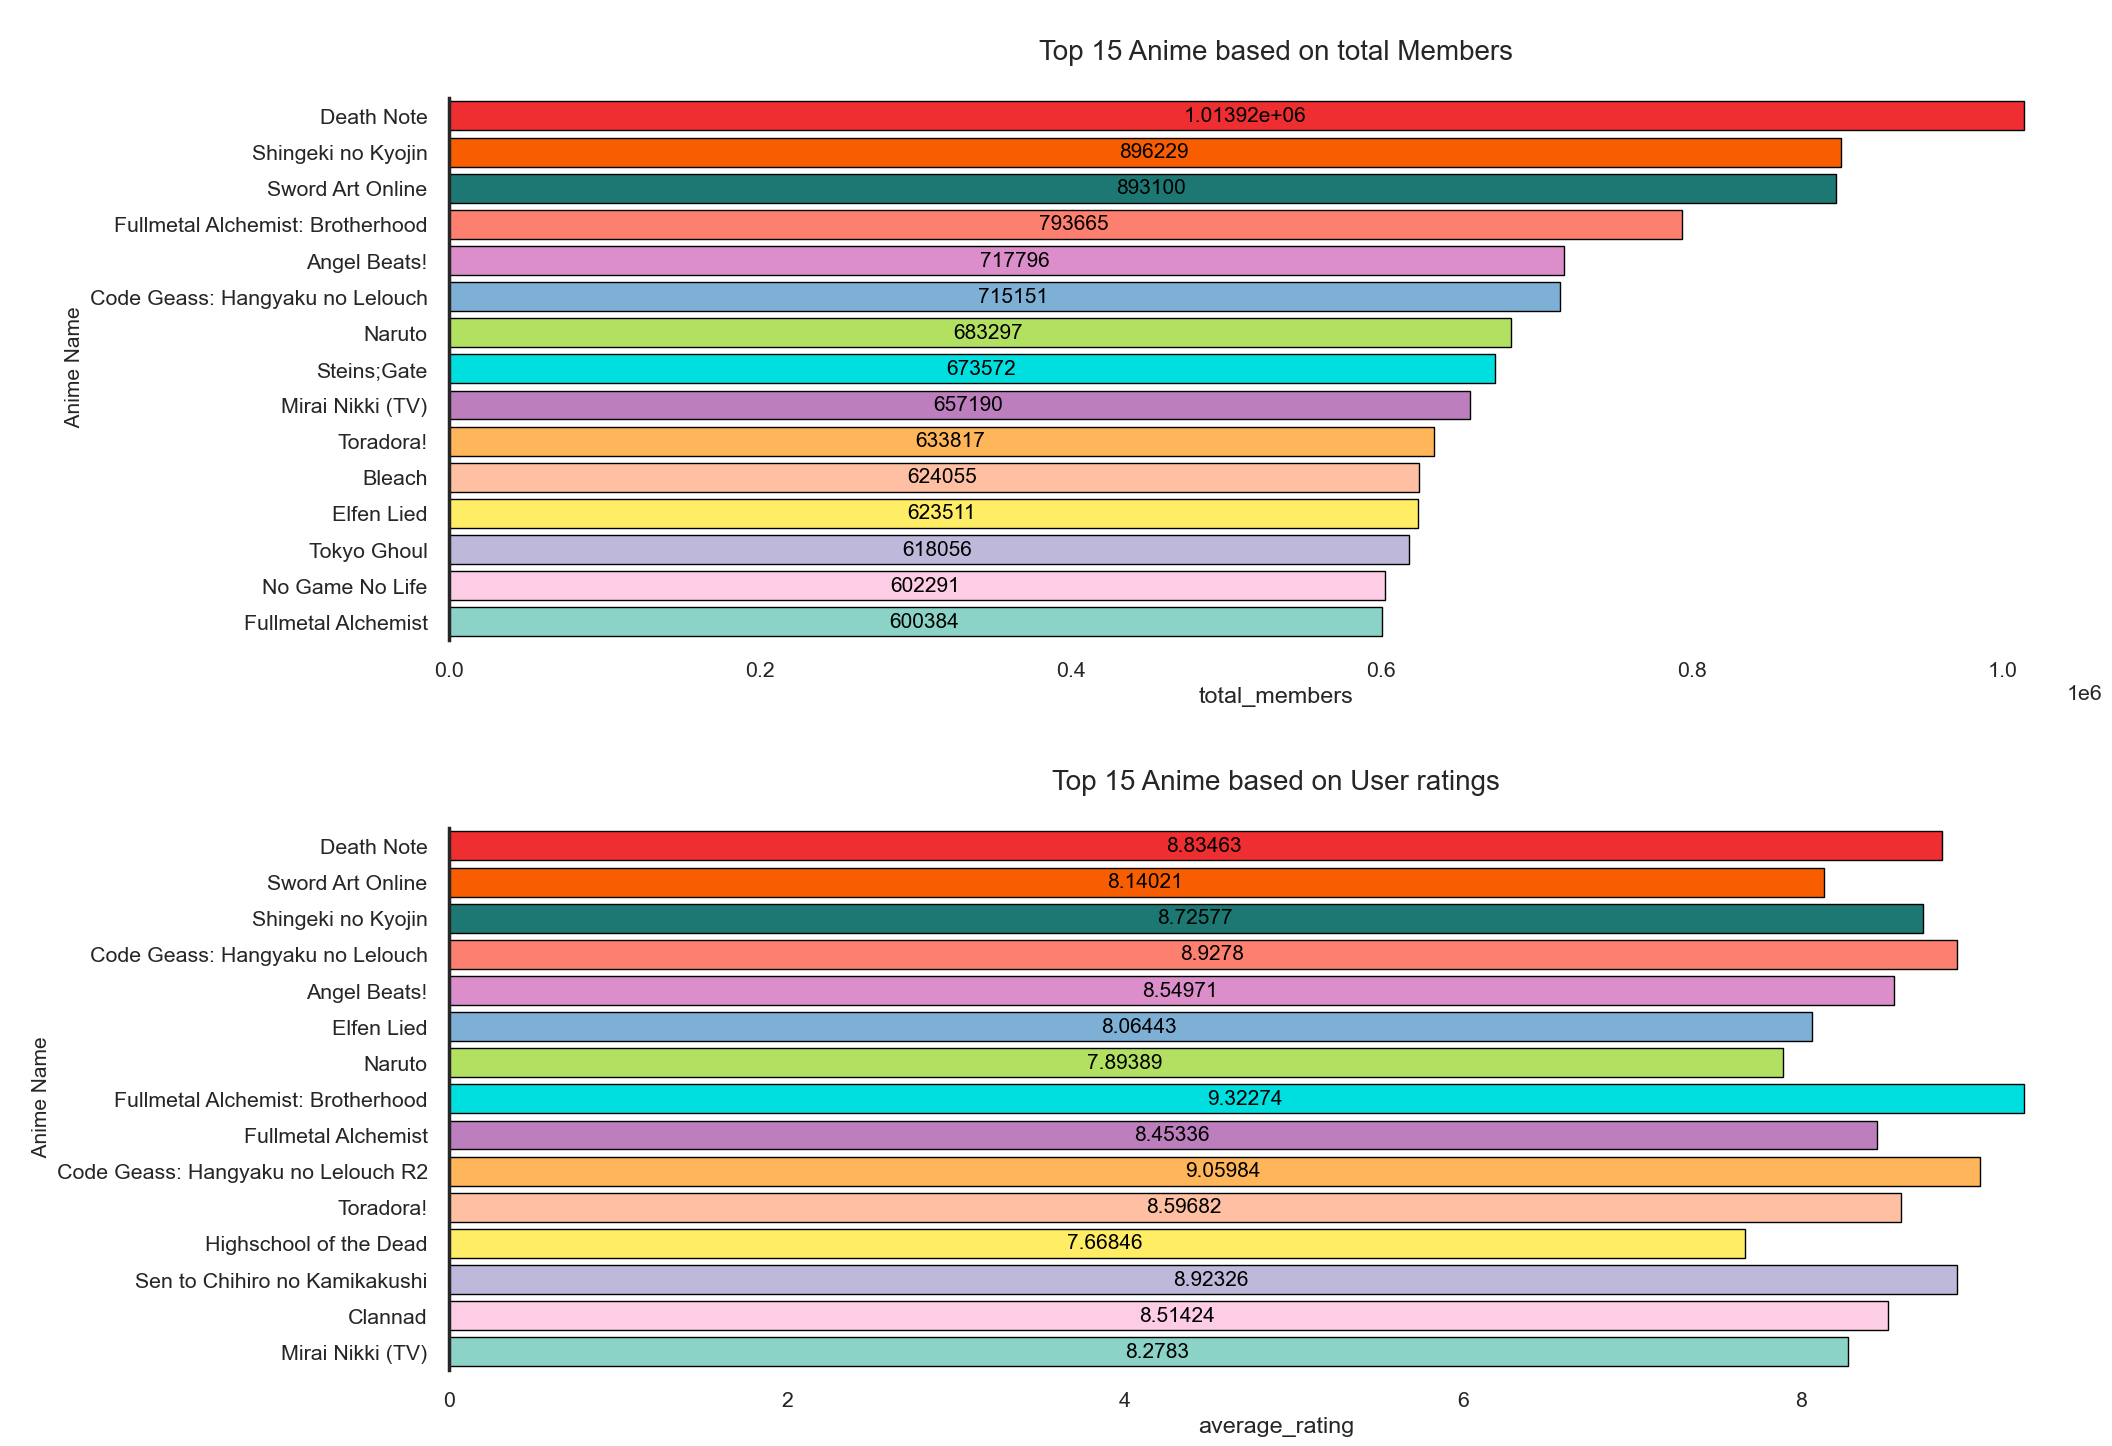

In [427]:
_, axs = plt.subplots(2,1,figsize=(20,16),sharex=False,sharey=False) 
plt.tight_layout(pad=6.0) #setting the figure size and properties of subplots

plot_1 = sns.barplot(x=set1["total_members"], y=set1["name"][:15], ax=axs[0], palette=colors, label="Total", color="b", orient = 'h', edgecolor = "black", linewidth = 1,saturation=4)
axs[0].set_ylabel("\n Anime Name", fontsize = 15)
axs[0].set_title("\nTop 15 Anime based on total Members\n",fontsize = 20)
sns.despine(bottom=True) #creating a bar plot of top 15 Anime based on total_members

for container in plot_1.containers: #creating bar labels
    plot_1.bar_label(container,label_type = "center",padding = 6,size = 15,color = "black")

plot_2 = sns.barplot(x=set2["average_rating"], y=set2["name"][:15], ax=axs[1], palette=colors, label="Total", color="b", orient = 'h', edgecolor = "black", linewidth = 1,saturation=4)
axs[1].set_ylabel("\n Anime Name", fontsize = 15)
axs[1].set_title("\nTop 15 Anime based on User ratings\n",fontsize = 20)
sns.despine(bottom=True) #creating a bar plot of top 15 Anime based on user_ratings

for container in plot_2.containers: #creating bar labels
    plot_2.bar_label(container,label_type = "center",padding = 6,size = 15,color = "black")

plt.show()

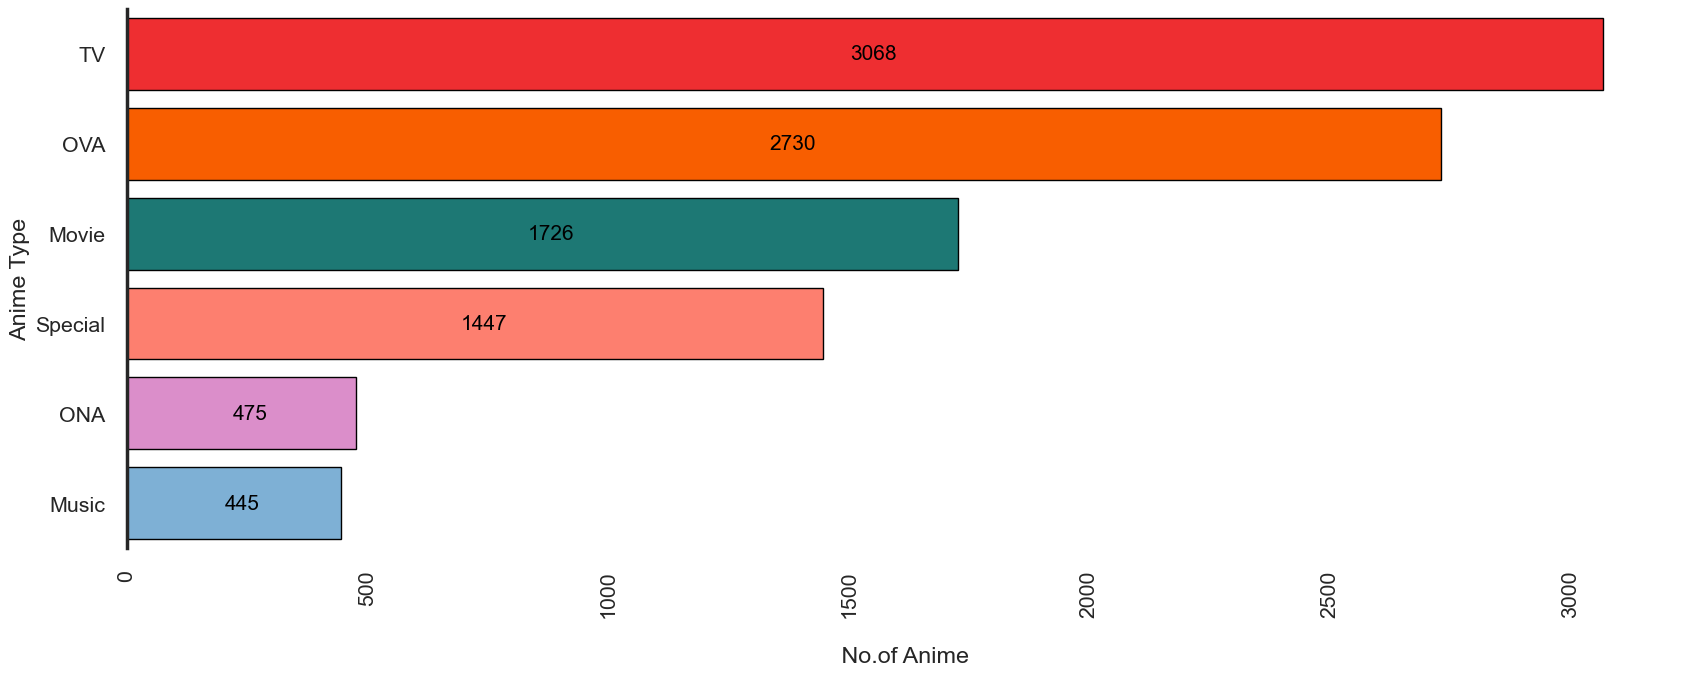

In [428]:
f, ax = plt.subplots(figsize=(20, 7))
plot_2 = sns.countplot(y=set1['type'],order = set1["type"].value_counts().index, palette=colors, label="Total", color="b", orient = 'h', edgecolor = "black", linewidth = 1,saturation=4)
plt.xticks(rotation = 90) #creating a bar plot of anime by type

plt.xlabel("\n No.of Anime")
plt.ylabel("Anime Type")
sns.despine(bottom=True)

for container in plot_2.containers: #creating bar labels
    plot_2.bar_label(container,label_type = "center",padding = 6,size = 15,color = "black")
plt.show()

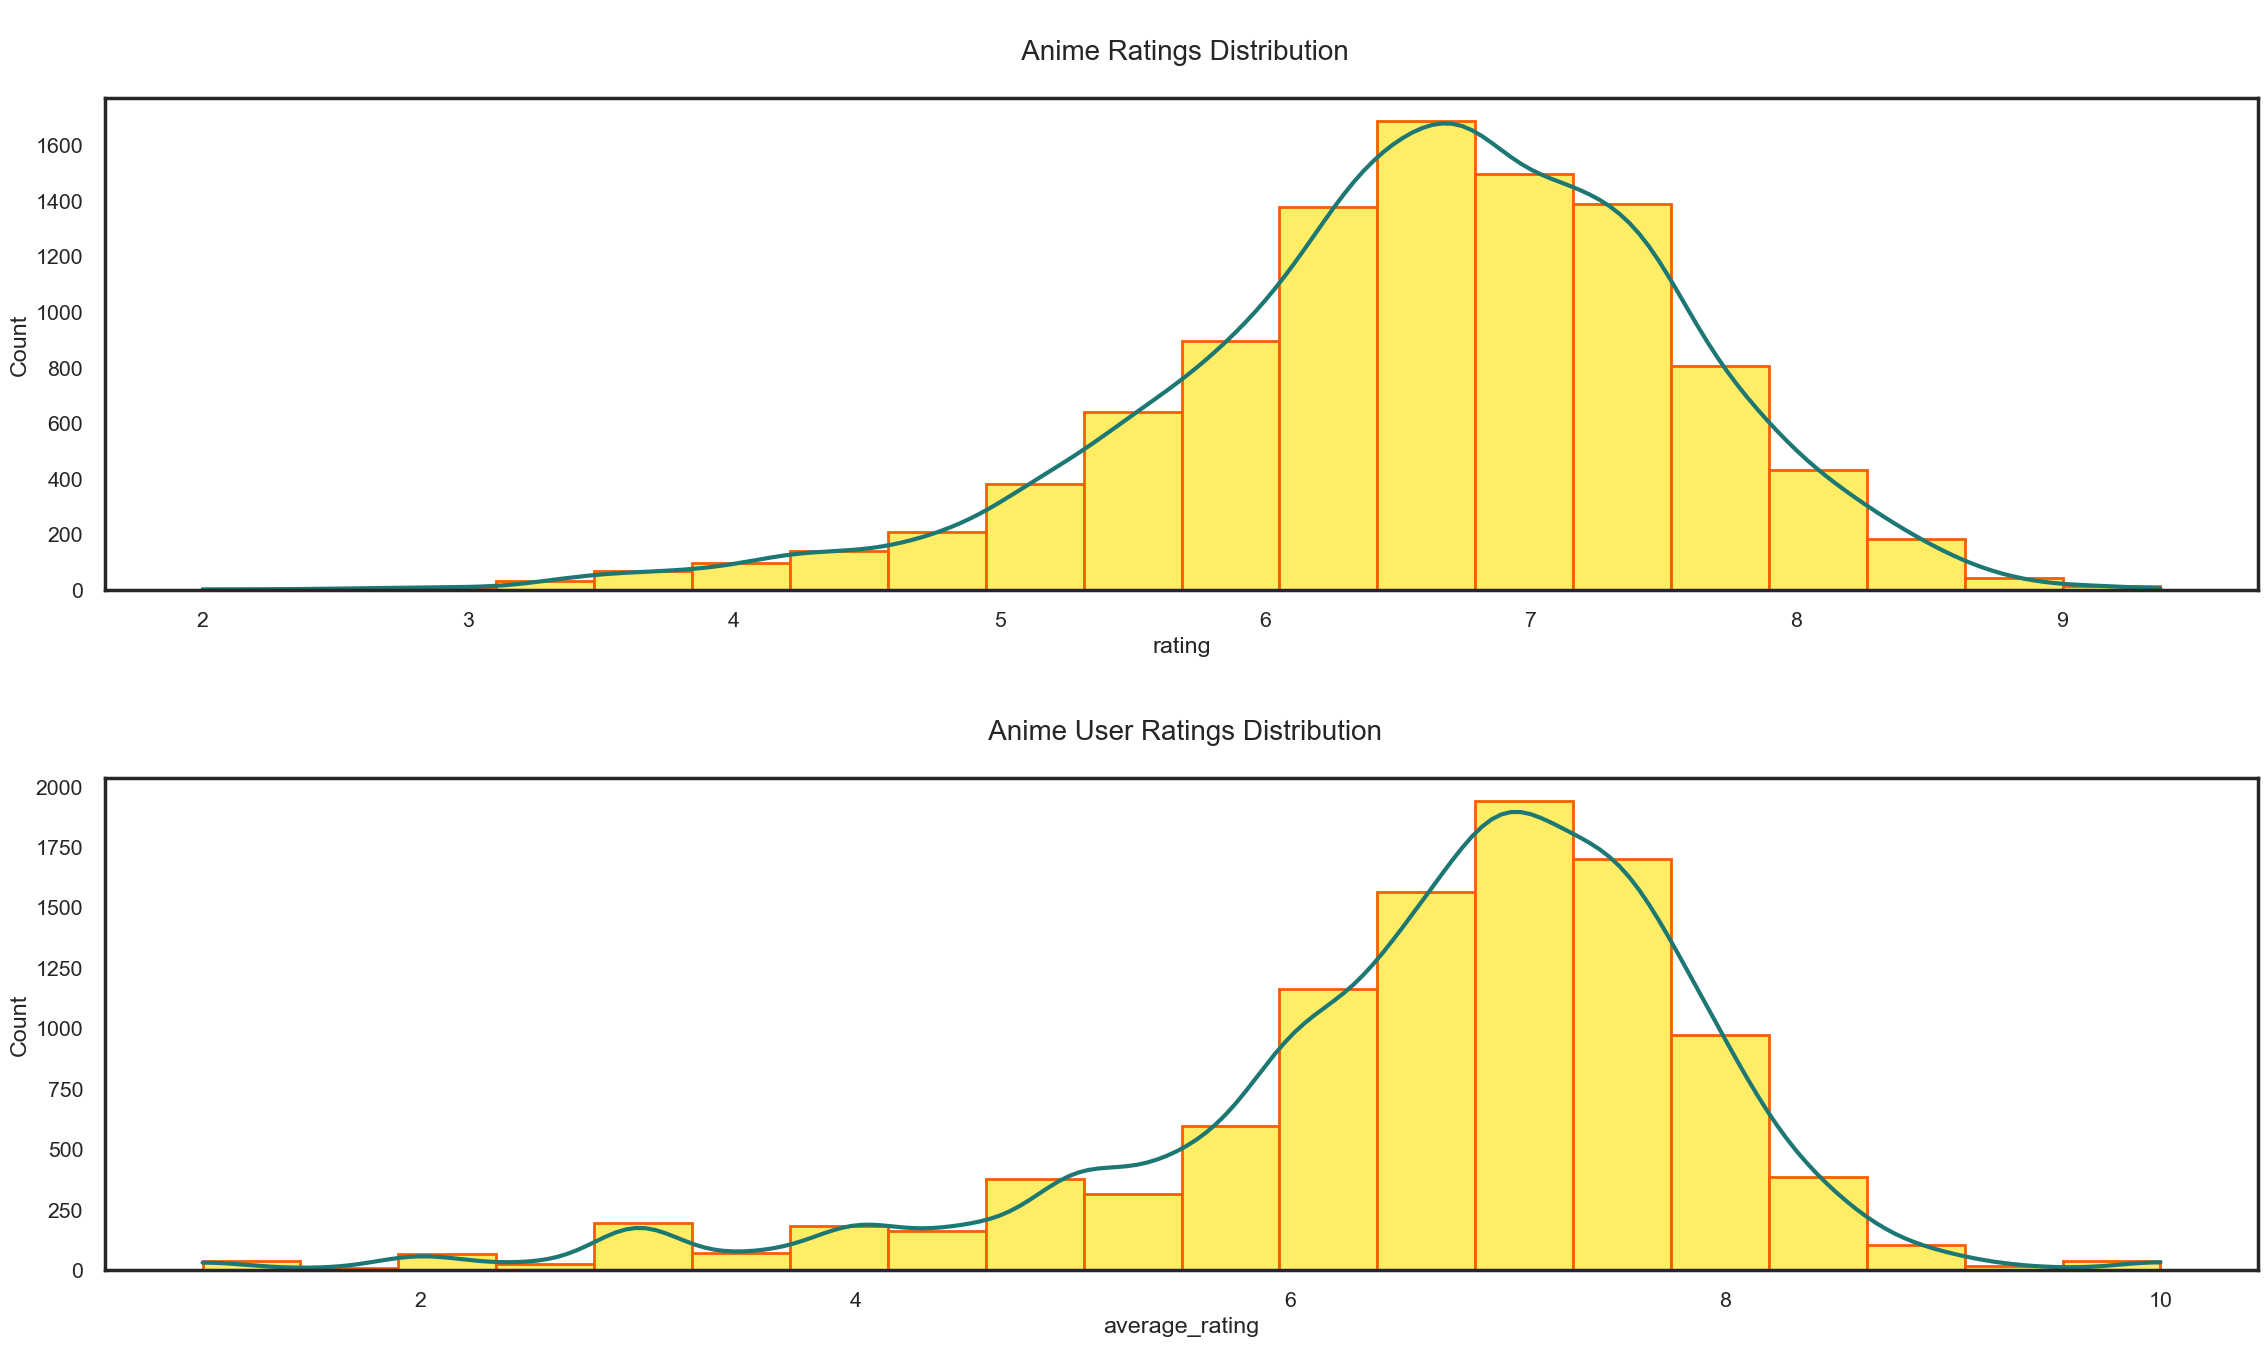

In [429]:
_, axs = plt.subplots(2,1,figsize=(25,15),sharex=False,sharey=False)
plt.tight_layout(pad=6.0) #setting the figure size and properties of subplots

sns.histplot(set2["rating"],color=colors[11],kde=True,ax=axs[0],bins=20,alpha=1,fill=True,edgecolor=colors[1])
axs[0].lines[0].set_color(colors[2])
axs[0].set_title("\n Anime Ratings Distribution\n",fontsize = 20) #creating a histplot to check the distribution of anime rating

sns.histplot(set2["average_rating"],color=colors[11],kde=True,ax=axs[1],bins=20,alpha=1,fill=True,edgecolor=colors[1])
axs[1].lines[0].set_color(colors[2])
axs[1].set_title("\n Anime User Ratings Distribution\n",fontsize = 20); #creating a histplot to check the distribution of average user rating 

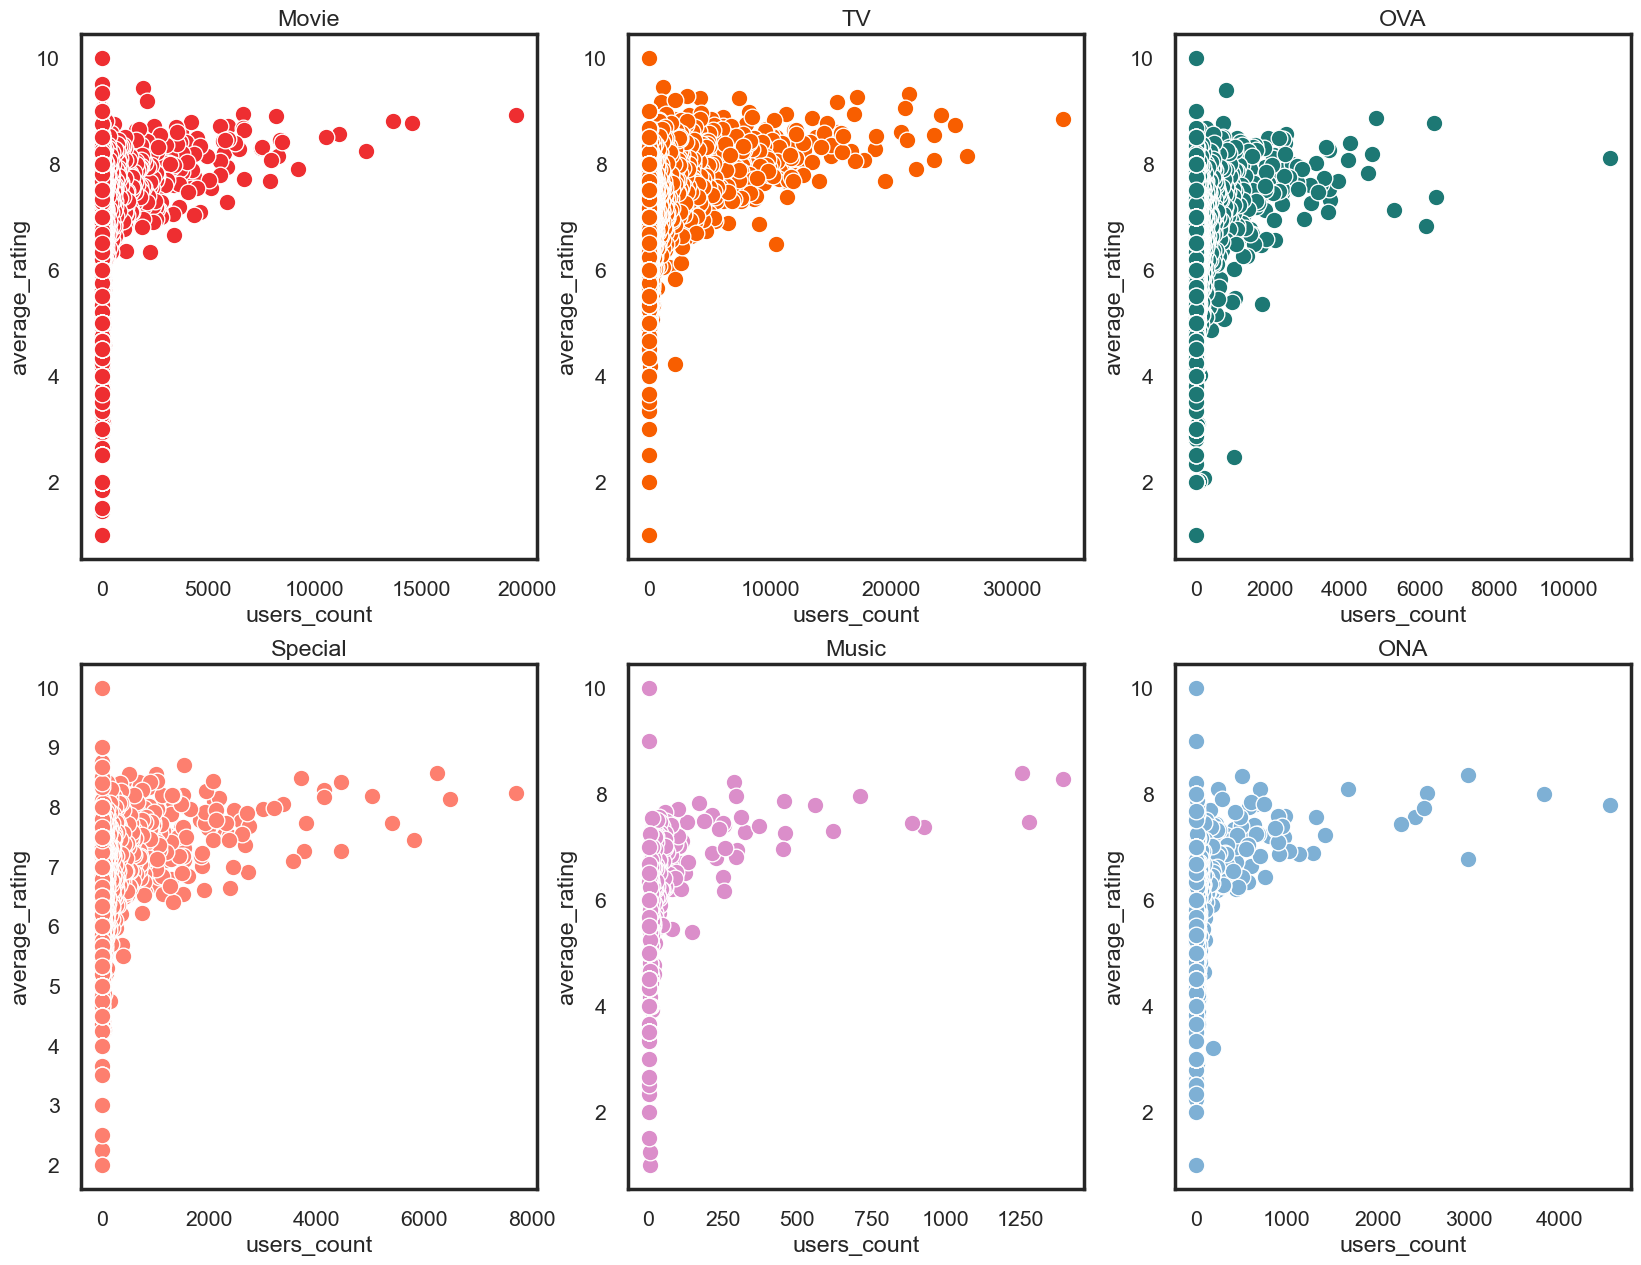

In [430]:
plt.figure(figsize=(20,15))

anime_type=anime_details['type'].unique() #creating a variable that contains all the types of anime

for x,y in enumerate(anime_type):
    plt.subplot(2,3,x+1)
    types= set1[set1['type']==y]
    sns.scatterplot(x=types['users_count'],y=types['average_rating'],color=colors[x])
    plt.title(f'{y}') #plotting subplot on average_rating vs users_count for different types of anime
   

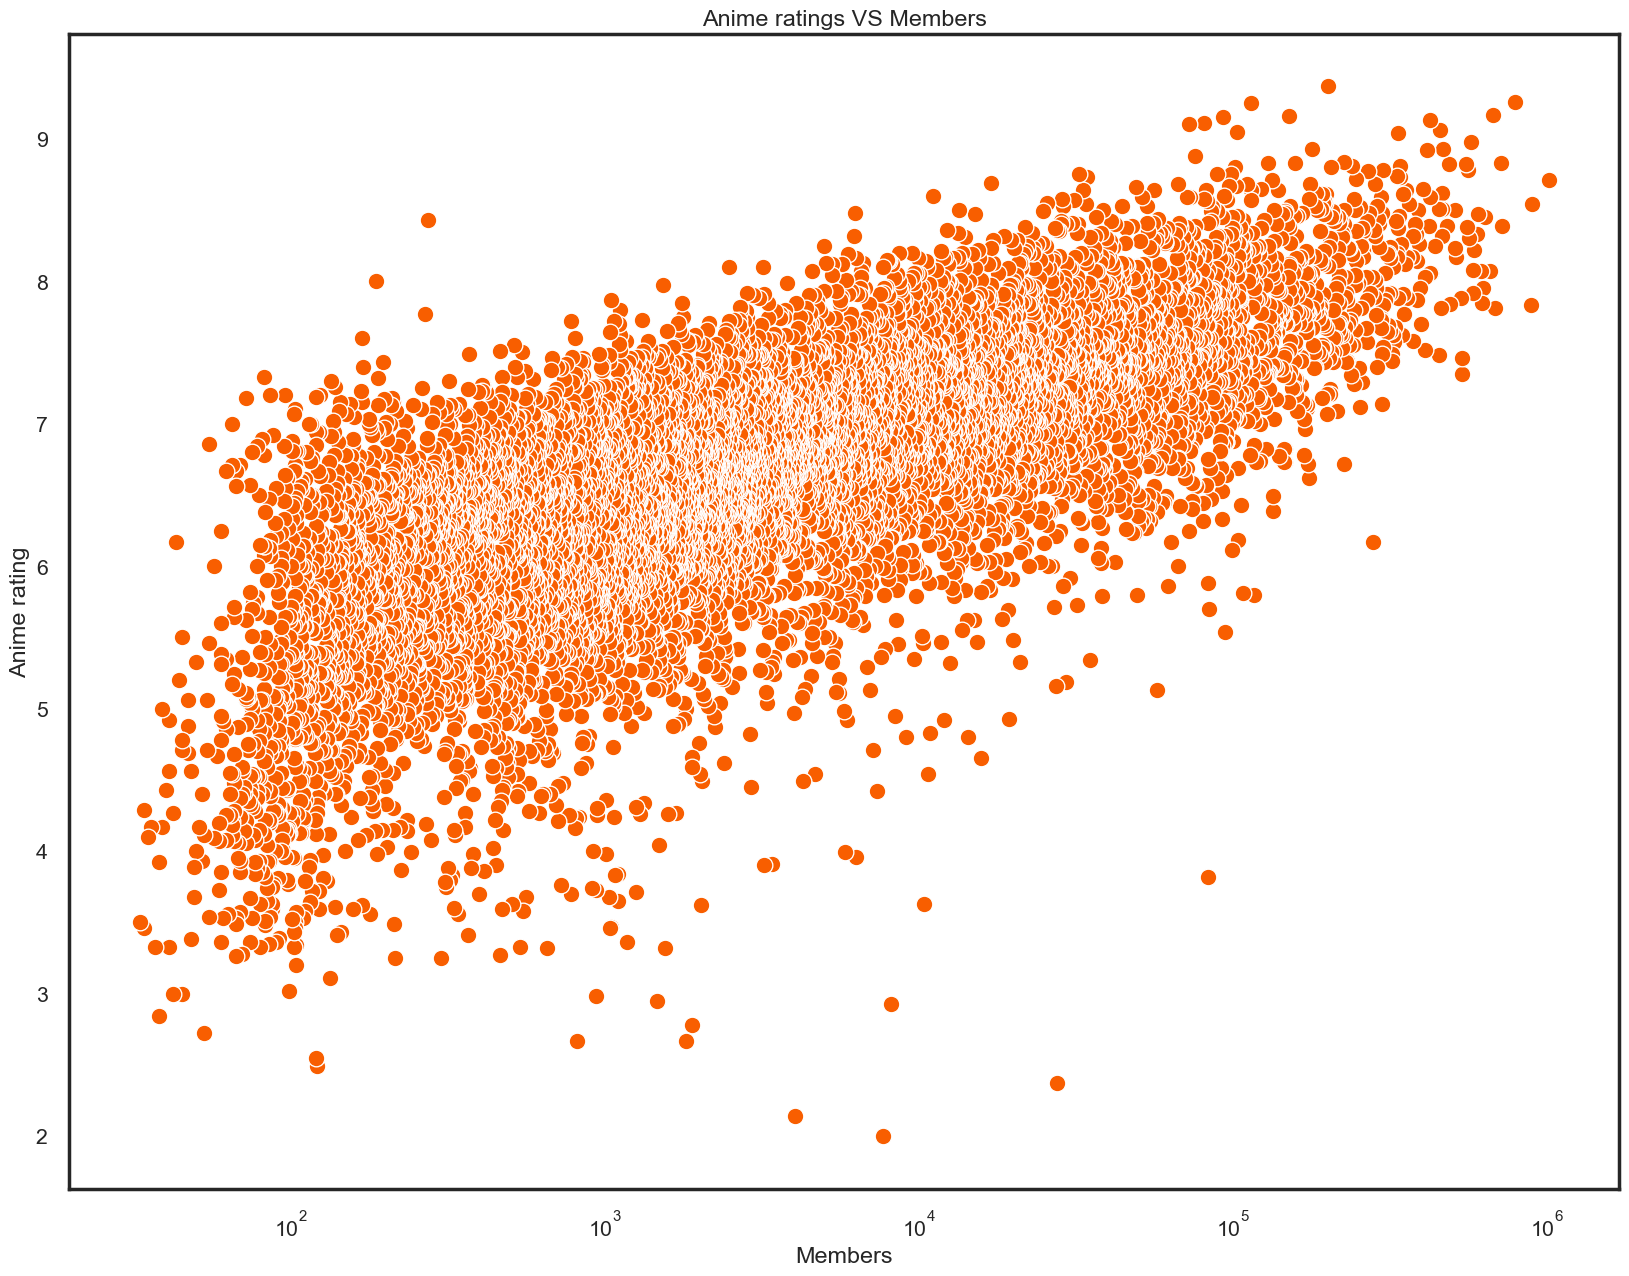

In [431]:
#plotting a scatter plot between total_members and rating of the anime
plt.figure(figsize=(20,15))
sns.scatterplot(x=set1['total_members'],y=set1['rating'],color=colors[1])
ax=plt.gca(projection='polar')
ax.set_xscale('log')
plt.title('Anime ratings VS Members')
plt.xlabel('Members')
plt.ylabel('Anime rating')
plt.show()

**Final Preprocessing**

In [432]:
set3 = anime_merged_temp.copy()

#using labelencoder to conver the categorical variable 'type' to numerical variable
le = LabelEncoder()

type_label = le.fit_transform(anime_merged_temp['type']) #
type_mappings = {index: label for index, label in enumerate(le.classes_)}

print(type_mappings)

set3['type'] = type_label

{0: 'Movie', 1: 'Music', 2: 'ONA', 3: 'OVA', 4: 'Special', 5: 'TV'}


In [433]:
set3.head().style.set_table_styles([headers,cells,caption]).set_caption("Let's take a look at the dataframe with encoded values")

,anime_id,name,genre,type,episodes,rating,total_members,users_count,average_rating
0,1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",5,26.000000,8.820000,486824,13449,8.869433
1,5,Cowboy Bebop: Tengoku no Tobira,"Action, Drama, Mystery, Sci-Fi, Space",0,1.000000,8.400000,137636,5790,8.439724
2,6,Trigun,"Action, Comedy, Sci-Fi",5,26.000000,8.320000,283069,9385,8.419393
3,7,Witch Hunter Robin,"Action, Drama, Magic, Mystery, Police, Supernatural",5,26.000000,7.360000,64905,2169,7.533426
4,8,Beet the Vandel Buster,"Adventure, Fantasy, Shounen, Supernatural",5,52.000000,7.060000,9848,308,7.198052


In [434]:
#Onehot Encoding the genre column using get_dummies 
genre_temp = set3['genre'].str.get_dummies(sep=', ') #using (sep=', ') since the genre column contains multiple geners spereated by commas
set3 = pd.concat([set3, genre_temp], axis = 1)
set3 = set3.drop(["rating","genre"],axis=1)

In [435]:
set3['rating_bracket'] = round(set3['average_rating']) #rouding off average_rating to make it non-continuous

In [436]:
#Eliminating anime where <30 users have rated the anime
print(f'shape of set3 before removing Anime with less that 30 user ratings: {set3.shape}')
set3 = set3.loc[(set3['users_count'] >= 30)]
print(f'shape of set3 after removing Anime with less that 30 user ratings: {set3.shape}')
set3.head().style.set_table_styles([headers,cells,caption]).set_caption("Let's take a look at the final dataframe for model training")

shape of set3 before removing Anime with less that 30 user ratings: (9891, 51)
shape of set3 after removing Anime with less that 30 user ratings: (5942, 51)


,anime_id,name,type,episodes,total_members,users_count,average_rating,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,Harem,Hentai,Historical,Horror,Josei,Kids,Magic,Martial Arts,Mecha,Military,Music,Mystery,Parody,Police,Psychological,Romance,Samurai,School,Sci-Fi,Seinen,Shoujo,Shoujo Ai,Shounen,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri,rating_bracket
0,1,Cowboy Bebop,5,26.000000,486824,13449,8.869433,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,9.000000
1,5,Cowboy Bebop: Tengoku no Tobira,0,1.000000,137636,5790,8.439724,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,8.000000
2,6,Trigun,5,26.000000,283069,9385,8.419393,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.000000
3,7,Witch Hunter Robin,5,26.000000,64905,2169,7.533426,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,8.000000
4,8,Beet the Vandel Buster,5,52.000000,9848,308,7.198052,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,7.000000


**Treatinig the dataset as Classification problem**

In [437]:
#importing the required libraries for moedl fitting and evaluation
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
from sklearn.model_selection import ShuffleSplit,cross_val_score
from sklearn.model_selection import cross_val_score,RepeatedKFold
from sklearn.pipeline import Pipeline

In [438]:
# Applying scaler() to all the columns except the 'dummy' variables
num_vars = ['type', 'episodes', 'total_members', 'users_count']
set3[num_vars] = scaler.fit_transform(set3[num_vars])

In [439]:
#creating features and labels variables
c_features = set3.drop(['name','rating_bracket','average_rating','anime_id'],axis=1)
c_labels = set3['rating_bracket']

# splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(c_features, c_labels, test_size=0.2, random_state=42)

In [440]:
#checking for the best parameters for Random forest classifier 
# for our data using GridsearchCV method
rfc = RandomForestClassifier()
parameters = {
'n_estimators': [10,50,100,150],
'max_depth': [10,20,None]
}
rfc_cv = GridSearchCV(rfc, parameters, cv=5)
rfc_cv.fit(X_train, y_train.values.ravel())

print(rfc_cv.best_params_)

{'max_depth': 20, 'n_estimators': 50}


In [441]:
#fitting our data using randomforestclassifier model  
rfc_model = RandomForestClassifier(n_estimators=150, max_depth=20,random_state=101)
rfc_model.fit(X_train, y_train)
rfc_predicted = rfc_model.predict(X_test)
rfc_score = accuracy_score(y_test,rfc_predicted)
print(rfc_score)

0.6417157275021026


In [442]:
#checking for the features with major contribution
cols = ['name', 'importance']
lst1 = []
lst2 = []
for name, importance in zip(c_features.columns, rfc_model.feature_importances_):
    lst1.append([name,importance])
    
imp_df = pd.DataFrame(lst1,columns=cols)
imp_df.sort_values(by='importance',ascending=False).head()

,name,importance
2,total_members,0.230905
3,users_count,0.198882
1,episodes,0.084778
0,type,0.049959
7,Comedy,0.022458


In [443]:
#cross validating to check for variance
pipe = Pipeline([
    ('model', RandomForestClassifier(n_estimators=100, max_depth=20,random_state=101))
])

result_kf = cross_val_score(estimator=pipe, X=X_train, y=y_train, scoring='accuracy', cv=RepeatedKFold(n_splits=5, n_repeats=5))
display(result_kf)
print(result_kf.std())

array([0.65299685, 0.6382755 , 0.63722397, 0.64      , 0.65052632,
       0.66351209, 0.64353312, 0.64037855, 0.63052632, 0.65894737,
       0.62250263, 0.65720294, 0.65825447, 0.62842105, 0.63684211,
       0.67192429, 0.64143007, 0.64037855, 0.66      , 0.61157895,
       0.65825447, 0.6298633 , 0.63932702, 0.63894737, 0.63894737])

0.013753832694311172


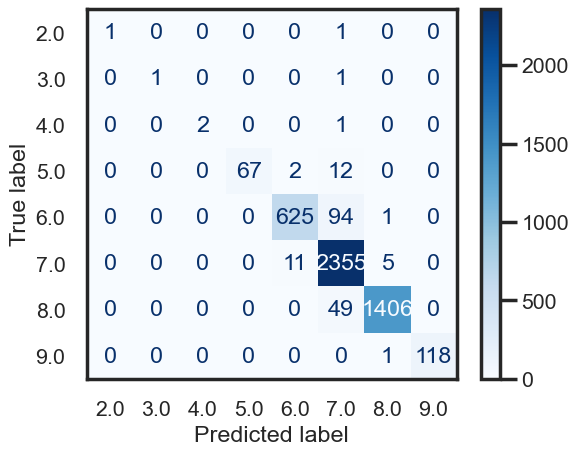

In [444]:
#plotting confusion matrix for training data
plot_confusion_matrix(rfc_model, X_train, y_train, cmap=plt.cm.Blues)
plt.show()

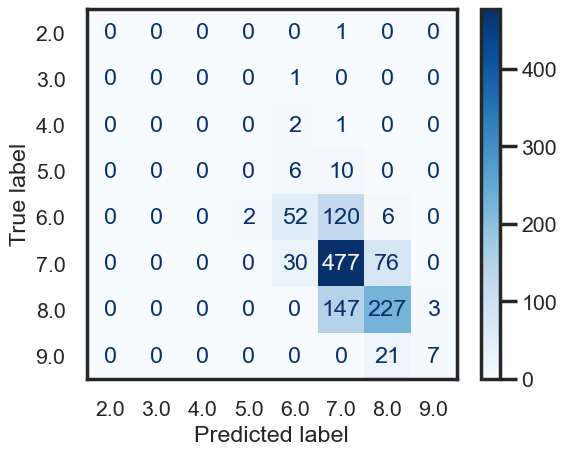

In [445]:
#plotting confusion matrix for testing data
plot_confusion_matrix(rfc_model, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

**Treatinig the dataset as Regression problem**

In [446]:
#creating features and labels variables

r_features = set3.drop(['name','rating_bracket','average_rating','anime_id'],axis=1)
r_labels = set3['average_rating']

# splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(r_features, r_labels, test_size=0.2, random_state=42)

In [447]:
#checking for the best parameters for Random forest regressor 
# for our data using GridsearchCV method
rfr = RandomForestRegressor()
parameters = {
'n_estimators': [50,100,150,200,250,300,350,400],
'max_depth': [10,20,None]
}
rfr_cv = GridSearchCV(rfr, parameters, cv=5)
rfr_cv.fit(X_train, y_train.values.ravel())

print(rfr_cv.best_params_)

{'max_depth': 20, 'n_estimators': 300}


In [448]:
#fitting our data using RandomForestRegressor model  

rfr_model = RandomForestRegressor(n_estimators=300, max_depth=20, random_state=42)
rfr_model.fit(X_train, y_train)
rf_predicted_values = rfr_model.predict(X_test)
mse = mean_squared_error(y_test, rf_predicted_values)
rmse = mse**.5
print(mse)
print(rmse)

0.28963192095231555
0.5381746193869751


In [449]:
#checking for the features with major contribution
cols = ['name', 'importance']
lst1 = []
lst2 = []
for name, importance in zip(r_features.columns, rfr_model.feature_importances_):
    lst1.append([name,importance])
    
imp_df = pd.DataFrame(lst1,columns=cols)
imp_df.sort_values(by='importance',ascending=False).head()

,name,importance
2,total_members,0.494963
3,users_count,0.103227
1,episodes,0.075584
0,type,0.049741
11,Ecchi,0.028615


In [450]:
#using monte carlo cross validation
shuffle_split=ShuffleSplit(test_size=0.3,train_size=0.5,n_splits=10)
scores=cross_val_score(estimator=rfr_model, X=X_train, y=y_train,cv=shuffle_split)
scores

array([0.46801582, 0.50751823, 0.48772414, 0.50531655, 0.49071979,
       0.50167606, 0.50453618, 0.50133032, 0.51647738, 0.48406785])

In [451]:
#comparing the predicted values with test values
data = {'Test': y_test,'Predicted':rf_predicted_values}

df = pd.DataFrame(data)
df.head()

,Test,Predicted
7196,7.257261,7.235997
2394,6.123288,6.427557
1465,7.413570,7.248583
7953,7.394531,7.056332
3654,7.401709,7.056382
